# 1.Use the IMDB dataset and solve the below questions and perform sentiment analysis
# a.	Perform sentiment analysis using AFINN and Vader
# b.	Label the reviews as 0 or 1 using Vader sentiment. Choose the best bins for labelling. Check the correctness of the Vader labels with the actual labels given in the dataset 

In [69]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
stemmer_s=SnowballStemmer("english")
from string import punctuation
from nltk.corpus import stopwords
stop_words=stopwords.words('english')+list(punctuation)

In [70]:
afinn=pd.read_csv("AFINN-111.txt",sep='\t',header=None)

In [71]:
data=pd.read_csv("imdb_sentiment.csv")
data.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [72]:
def clean_txt(sent):
    tokens=word_tokenize(sent.lower().replace('[^a-z]',' '))
    stemmed=[stemmer_s.stem(term) for term in tokens if term not in stop_words and len(term)>2]
    res=" ".join(stemmed)
    return res

In [73]:
data['Clened_reviews']=data.review.apply(clean_txt)
data.head()

,review,sentiment,Clened_reviews
0,"A very, very, very slow-moving, aimless movie ...",0,slow-mov aimless movi distress drift young man
1,Not sure who was more lost - the flat characte...,0,sure lost flat charact audienc near half walk
2,Attempting artiness with black & white and cle...,0,attempt arti black white clever camera angl mo...
3,Very little music or anything to speak of.,0,littl music anyth speak
4,The best scene in the movie was when Gerardo i...,1,best scene movi gerardo tri find song keep run...


# Sentiment Analysis using AFFIN

In [74]:
afinn.columns=['Term','Score']
term_score=dict(afinn.values)

In [75]:
afinn.head()

,Term,Score
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [76]:
def sentiments(sent):
    tokens=word_tokenize(sent.lower())
    score=0
    for term in tokens:
        score+=term_score.get(term,0)
    return score

In [77]:
data['Sent_score']=data.Clened_reviews.apply(sentiments)
data.head()

,review,sentiment,Clened_reviews,Sent_score
0,"A very, very, very slow-moving, aimless movie ...",0,slow-mov aimless movi distress drift young man,-2
1,Not sure who was more lost - the flat characte...,0,sure lost flat charact audienc near half walk,-3
2,Attempting artiness with black & white and cle...,0,attempt arti black white clever camera angl mo...,-2
3,Very little music or anything to speak of.,0,littl music anyth speak,0
4,The best scene in the movie was when Gerardo i...,1,best scene movi gerardo tri find song keep run...,3


In [78]:
import matplotlib.pyplot as plt

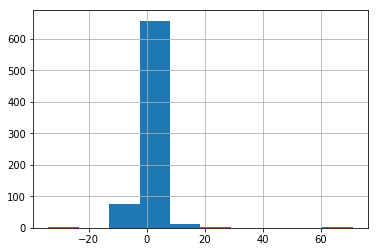

In [79]:
data.Sent_score.hist()

In [80]:
data['sentimen_prediction']=data.Sent_score.apply(lambda x:1 if x>0 else 0)
data.head()

,review,sentiment,Clened_reviews,Sent_score,sentimen_prediction
0,"A very, very, very slow-moving, aimless movie ...",0,slow-mov aimless movi distress drift young man,-2,0
1,Not sure who was more lost - the flat characte...,0,sure lost flat charact audienc near half walk,-3,0
2,Attempting artiness with black & white and cle...,0,attempt arti black white clever camera angl mo...,-2,0
3,Very little music or anything to speak of.,0,littl music anyth speak,0,0
4,The best scene in the movie was when Gerardo i...,1,best scene movi gerardo tri find song keep run...,3,1


# Sentiment Analysis using Vader

In [81]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser=SentimentIntensityAnalyzer()

In [82]:
def vader_sentiments(sent):
    return analyser.polarity_scores(sent)['compound']

In [83]:
data['vader_score']=data.review.apply(vader_sentiments)
data.head()

,review,sentiment,Clened_reviews,Sent_score,sentimen_prediction,vader_score
0,"A very, very, very slow-moving, aimless movie ...",0,slow-mov aimless movi distress drift young man,-2,0,-0.4215
1,Not sure who was more lost - the flat characte...,0,sure lost flat charact audienc near half walk,-3,0,-0.5507
2,Attempting artiness with black & white and cle...,0,attempt arti black white clever camera angl mo...,-2,0,-0.7178
3,Very little music or anything to speak of.,0,littl music anyth speak,0,0,0.0000
4,The best scene in the movie was when Gerardo i...,1,best scene movi gerardo tri find song keep run...,3,1,0.6369


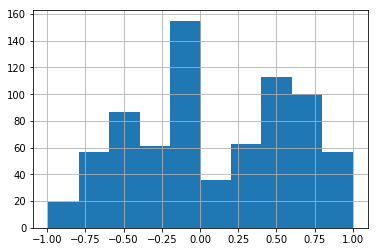

In [84]:
data.vader_score.hist()

In [85]:
data['vader_sentiment_score']=data.vader_score.apply(lambda x:1 if x>0.25 else 0)

In [86]:
data.head()

,review,sentiment,Clened_reviews,Sent_score,sentimen_prediction,vader_score,vader_sentiment_score
0,"A very, very, very slow-moving, aimless movie ...",0,slow-mov aimless movi distress drift young man,-2,0,-0.4215,0
1,Not sure who was more lost - the flat characte...,0,sure lost flat charact audienc near half walk,-3,0,-0.5507,0
2,Attempting artiness with black & white and cle...,0,attempt arti black white clever camera angl mo...,-2,0,-0.7178,0
3,Very little music or anything to speak of.,0,littl music anyth speak,0,0,0.0000,0
4,The best scene in the movie was when Gerardo i...,1,best scene movi gerardo tri find song keep run...,3,1,0.6369,1


In [87]:
from sklearn.metrics import accuracy_score

In [88]:
accuracy_score(data.sentiment,data.vader_sentiment_score)

0.786096256684492

# Use the IMDB dataset and solve the below questions classify the data based on sentiment score
# a.	Label the reviews on a five-point scale of 0 to 4 using Vader sentiment. Choose the best bins for labelling. Use the review text as features and the five-point scale of Vader sentiment as label to build a multi-class classification model and predict the sentiment of the IMDB review with test size of 20% and choose random state as zero
# b.	Compute the confusion matrix, accuracy, precision, recall, F1 score


In [89]:
data.head()

,review,sentiment,Clened_reviews,Sent_score,sentimen_prediction,vader_score,vader_sentiment_score
0,"A very, very, very slow-moving, aimless movie ...",0,slow-mov aimless movi distress drift young man,-2,0,-0.4215,0
1,Not sure who was more lost - the flat characte...,0,sure lost flat charact audienc near half walk,-3,0,-0.5507,0
2,Attempting artiness with black & white and cle...,0,attempt arti black white clever camera angl mo...,-2,0,-0.7178,0
3,Very little music or anything to speak of.,0,littl music anyth speak,0,0,0.0000,0
4,The best scene in the movie was when Gerardo i...,1,best scene movi gerardo tri find song keep run...,3,1,0.6369,1


In [99]:
df=data[['Clened_reviews','vader_score']]
df.head()

,Clened_reviews,vader_score
0,slow-mov aimless movi distress drift young man,-0.4215
1,sure lost flat charact audienc near half walk,-0.5507
2,attempt arti black white clever camera angl mo...,-0.7178
3,littl music anyth speak,0.0000
4,best scene movi gerardo tri find song keep run...,0.6369


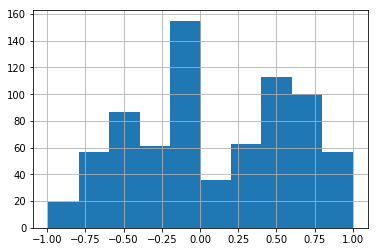

In [100]:
data.vader_score.hist()

In [101]:
a=[]
for i in data['vader_score']:
    if i>=-1 and i<-0.5:
        a.append(0)
    elif i>=-0.5 and i < 0:
        a.append(1)
    elif i>=0.25 and i<0.5:
        a.append(3)
    else:
        a.append(4)

In [103]:
df['labels']=a

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [107]:
df.head()

,Clened_reviews,vader_score,labels
0,slow-mov aimless movi distress drift young man,-0.4215,1
1,sure lost flat charact audienc near half walk,-0.5507,0
2,attempt arti black white clever camera angl mo...,-0.7178,0
3,littl music anyth speak,0.0000,4
4,best scene movi gerardo tri find song keep run...,0.6369,4


In [109]:
x= df.Clened_reviews.values
y=df.labels.values

In [110]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=0)

In [111]:
from sklearn.feature_extraction.text import CountVectorizer

In [112]:
vect=CountVectorizer(max_features=2000)

In [113]:
xtrain_bow=vect.fit_transform(xtrain)
xtest_bow=vect.transform(xtest)

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
log=LogisticRegression()

In [116]:
log.fit(xtrain_bow,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [117]:
ypred=log.predict(xtest_bow)

In [118]:
accuracy_score(ytest,ypred)

0.52

In [119]:
from sklearn.metrics import confusion_matrix,f1_score,classification_report

In [122]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.65      0.43      0.52        30
           1       0.20      0.06      0.09        34
           3       0.40      0.11      0.17        18
           4       0.53      0.90      0.67        68

   micro avg       0.52      0.52      0.52       150
   macro avg       0.45      0.38      0.36       150
weighted avg       0.46      0.52      0.45       150



In [126]:
print(confusion_matrix(ytest,ypred))

[[13  4  0 13]
 [ 4  2  2 26]
 [ 1  0  2 15]
 [ 2  4  1 61]]
